100%|██████████| 10000/10000 [01:30<00:00, 110.46it/s]


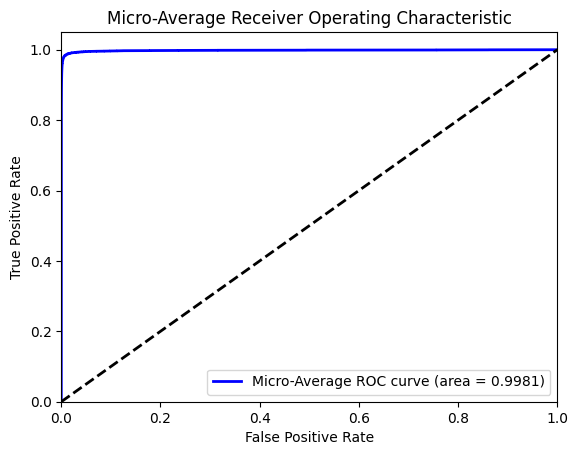

Metrics saved to /home/z/Music/code/CAIN/imagenet/ConvNext_val_images10k_metrics.txt


100%|██████████| 10000/10000 [00:57<00:00, 173.67it/s]


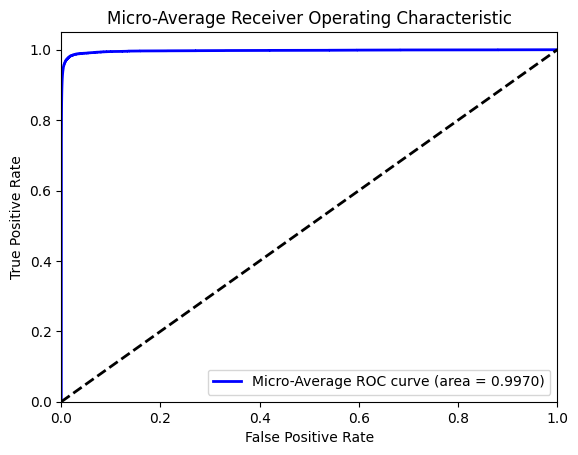

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/gaussian_noise/ConvNext_1_metrics.txt


100%|██████████| 10000/10000 [00:56<00:00, 177.33it/s]


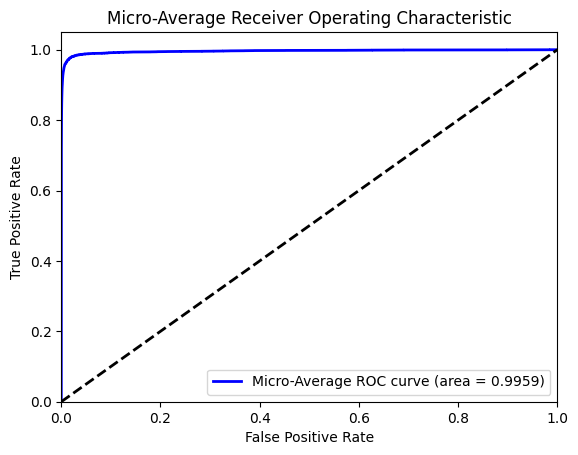

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/gaussian_noise/ConvNext_2_metrics.txt


100%|██████████| 10000/10000 [00:59<00:00, 167.48it/s]


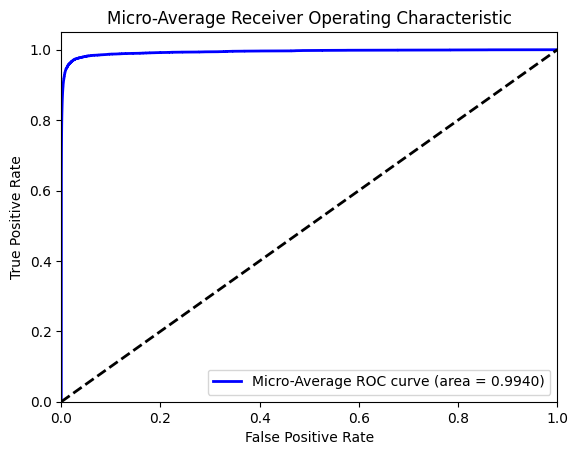

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/gaussian_noise/ConvNext_3_metrics.txt


100%|██████████| 10000/10000 [00:54<00:00, 185.05it/s]


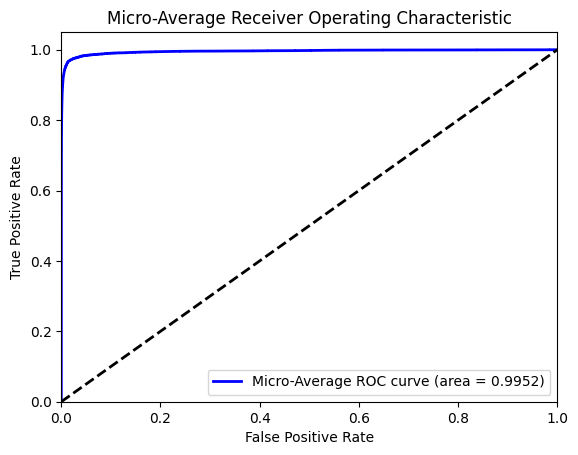

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/defocus_blur/ConvNext_1_metrics.txt


100%|██████████| 10000/10000 [00:53<00:00, 185.86it/s]


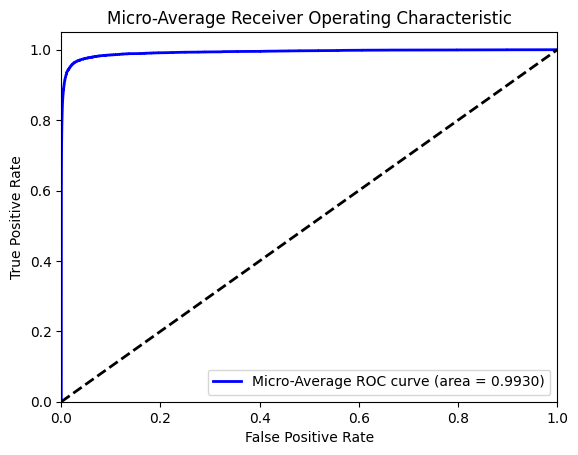

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/defocus_blur/ConvNext_2_metrics.txt


100%|██████████| 10000/10000 [00:54<00:00, 184.29it/s]


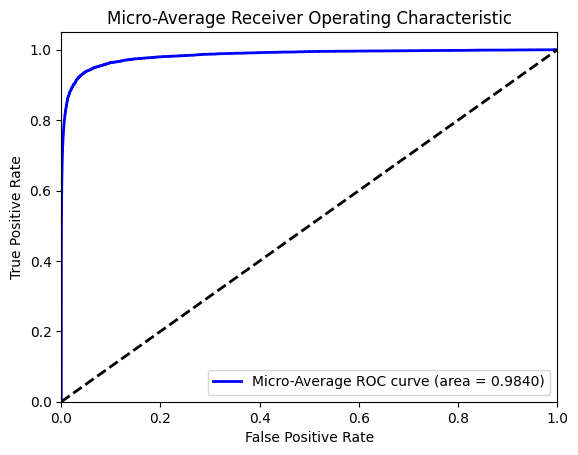

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/defocus_blur/ConvNext_3_metrics.txt


100%|██████████| 10000/10000 [00:54<00:00, 182.53it/s]


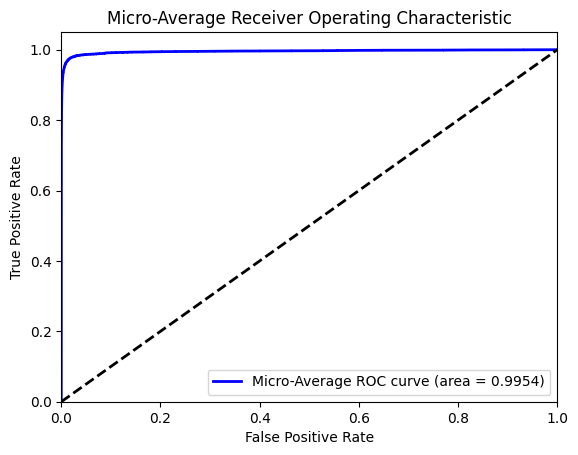

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/pixelate/ConvNext_1_metrics.txt


100%|██████████| 10000/10000 [00:55<00:00, 180.87it/s]


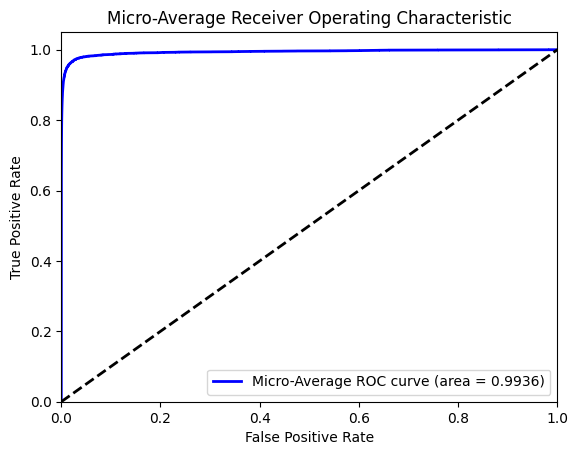

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/pixelate/ConvNext_2_metrics.txt


100%|██████████| 10000/10000 [00:55<00:00, 180.77it/s]


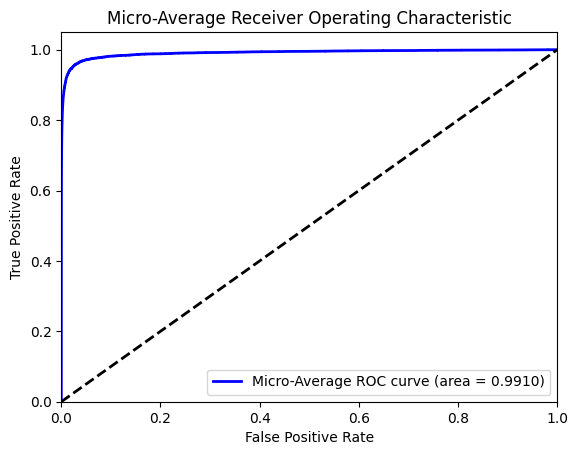

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/pixelate/ConvNext_3_metrics.txt


In [2]:
# # import os
# # from PIL import Image
# # import json
# # from torchvision import transforms
# # import torch
# # from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
# # from tqdm import tqdm
# # from transformers import ConvNextForImageClassification
# # from functools import partial
# # import shutil
# import os
# import numpy as np
# from PIL import Image
# from tqdm import tqdm
# from torchvision import transforms
# from transformers import ConvNextForImageClassification
# from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
# from sklearn.preprocessing import label_binarize
# import matplotlib.pyplot as plt
# import json
# import torch

# # Function to load images
# def load_images_from_directory(root_path: str):
#     dataset = []
#     for label in os.listdir(root_path):
#         label_path = os.path.join(root_path, label)
#         if os.path.isdir(label_path):
#             for image_file in os.listdir(label_path):
#                 image_path = os.path.join(label_path, image_file)
#                 if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
#                     img = Image.open(image_path)
#                     dataset.append((img, label, image_file))
#     return dataset

# current_dir = "/home/z/Music/code/CAIN"
# #dataset_path = f"{current_dir}/imagenet/val_images10k_attack/gaussian_noise/1"

# dataset_paths = [
#     f"{current_dir}/imagenet/val_images10k",
#     f"{current_dir}/imagenet/val_images10k_attack/gaussian_noise/1",
#     f"{current_dir}/imagenet/val_images10k_attack/gaussian_noise/2",
#     f"{current_dir}/imagenet/val_images10k_attack/gaussian_noise/3",
#     f"{current_dir}/imagenet/val_images10k_attack/defocus_blur/1",
#     f"{current_dir}/imagenet/val_images10k_attack/defocus_blur/2",
#     f"{current_dir}/imagenet/val_images10k_attack/defocus_blur/3", 
#     f"{current_dir}/imagenet/val_images10k_attack/pixelate/1",
#     f"{current_dir}/imagenet/val_images10k_attack/pixelate/2",
#     f"{current_dir}/imagenet/val_images10k_attack/pixelate/3",
# ]
# predicted_probs = []

# for dataset_path in dataset_paths:


#     dataset = load_images_from_directory(dataset_path)

#     # Load ImageNet class index
#     with open(f"{current_dir}/imagenet/imagenet_class_index.json", "r") as f:
#         imagenet_class_index = json.load(f)

#     # Determine device
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#     label_to_index_description = {v[0]: (k, v[1]) for k, v in imagenet_class_index.items()}

#     # Initialize the ConvNext model
#     model = ConvNextForImageClassification.from_pretrained("facebook/convnext-tiny-224").to(device)
#     model.eval()

#     normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

#     transform = transforms.Compose([
#         transforms.Resize((224, 224)),
#         transforms.ToTensor(),
#         normalize
#     ])

#     def ensure_rgb(img):
#         if img.mode != 'RGB':
#             return img.convert('RGB')
#         return img
#     predicted_probs = []
#     true_labels = []
#     predicted_labels = []

#     # Create the target directory if it does not exist
#     target_dir = dataset_path + "_ConvNext"
#     os.makedirs(target_dir, exist_ok=True)

#     num_classes = 1000


#     for img, label, filename in tqdm(dataset):
#         img = ensure_rgb(img)  
#         img_tensor = transform(img).to(device)
        
#         # Model prediction
#         with torch.no_grad():
#             logits = model(img_tensor.unsqueeze(0)).logits
#             probabilities = torch.softmax(logits, dim=1).cpu().numpy()[0]

#         # Get true label
#         index_str, _ = label_to_index_description.get(label, (None, None))
#         if index_str is None:
#             continue
#         true_label = int(index_str)
#         true_labels.append(true_label)
#         predicted_probs.append(probabilities)

#     true_labels_binary = label_binarize(true_labels, classes=range(num_classes))
#     predicted_probs = np.array(predicted_probs)

#     # Micro-Average
#     fpr, tpr, _ = roc_curve(true_labels_binary.ravel(), predicted_probs.ravel())
#     roc_auc = auc(fpr, tpr)

#     plt.figure()
#     plt.plot(fpr, tpr, color='blue', lw=2, label='Micro-Average ROC curve (area = {0:0.4f})'.format(roc_auc))
#     plt.plot([0, 1], [0, 1], 'k--', lw=2)
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Micro-Average Receiver Operating Characteristic')
#     plt.legend(loc="lower right")
#     plt.show()

#     dataset_name = os.path.basename(dataset_path)
#     model_name = "ConvNext"
#     metrics_filename = f"{model_name}_{dataset_name}_metrics.txt"
#     metrics_path = os.path.join(os.path.dirname(dataset_path), metrics_filename)

#     with open(metrics_path, "w") as f:
#         f.write(f"Micro-Average AUC: {roc_auc:.5f}\n")

#     print(f"Metrics saved to {metrics_path}")



#     # for img, label, filename in tqdm(dataset):
#     #     img = ensure_rgb(img)  
#     #     img_tensor = transform(img).to(device)
        
#     #     # Model prediction
#     #     with torch.no_grad():
#     #         logits = model(img_tensor.unsqueeze(0)).logits
#     #         predicted_label = torch.argmax(logits, dim=1).item()
        
#     #     # Get true label
#     #     index_str, _ = label_to_index_description.get(label, (None, None))
#     #     if index_str is None:
#     #         continue
#     #     true_label = int(index_str)
#     #     true_labels.append(true_label)
#     #     predicted_labels.append(predicted_label)
#     #     # If prediction is correct, copy the image to the target directory
#     #     # if true_label == predicted_label:
#     #     #     source_path = os.path.join(dataset_path, label, filename)
#     #     #     target_label_dir = os.path.join(target_dir, label)
#     #     #     os.makedirs(target_label_dir, exist_ok=True)  # Make sure the directory exists
#     #     #     shutil.copy(source_path, target_label_dir)  # Copy the file

#     # precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='macro')
#     # print(f"Precision: {precision:.4f}")
#     # print(f"Recall: {recall:.4f}")
#     # print(f"F1 Score: {f1:.4f}")

#     # for target_class in set(true_labels):
#     #     # Use sklearn's confusion matrix
#     #     matrix = confusion_matrix(true_labels, predicted_labels, labels=[target_class])
#     #     if matrix.size == 1:
#     #         value = matrix[0][0]
#     #         if target_class in predicted_labels:  # It was predicted at least once
#     #             tp = value
#     #             tn, fp, fn = 0, 0, 0
#     #         else:  # It was never predicted
#     #             tn = value
#     #             tp, fp, fn = 0, 0, 0
#     #     else:
#     #         tn, fp, fn, tp = matrix.ravel()
        
#     #     print(f"For class {target_class}: TP={tp}, FP={fp}, FN={fn}, TN={tn}")

#     # dataset_name = os.path.basename(dataset_path)
#     # model_name = "ConvNext"
#     # # Prepare the metrics filename with the model name and dataset name
#     # metrics_filename = f"{model_name}_{dataset_name}.txt"
#     # metrics_path = os.path.join(os.path.dirname(dataset_path), metrics_filename)
#     # with open(metrics_path, "w") as f:
#     #     f.write(f"Precision: {precision:.4f}\n")
#     #     f.write(f"Recall: {recall:.4f}\n")
#     #     f.write(f"F1 Score: {f1:.4f}\n")

#     #     for target_class in sorted(set(true_labels)):
#     #         matrix = confusion_matrix(true_labels, predicted_labels, labels=[target_class])
#     #         if matrix.size == 1:
#     #             value = matrix[0][0]
#     #             if target_class in predicted_labels:  # It was predicted at least once
#     #                 tp = value
#     #                 tn, fp, fn = 0, 0, 0
#     #             else:  # It was never predicted
#     #                 tn = value
#     #                 tp, fp, fn = 0, 0, 0
#     #         else:
#     #             tn, fp, fn, tp = matrix.ravel() if matrix.size == 4 else (0, 0, 0, matrix[0][0])
#     #         # Now we append the confusion matrix for each class to the file
#     #         f.write(f"Class {target_class} - TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}\n")

#     # print(f"Metrics saved to {metrics_path}")

100%|██████████| 10000/10000 [01:25<00:00, 117.12it/s]


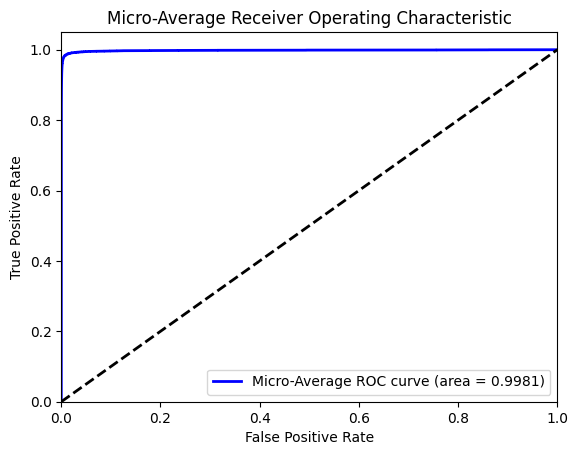

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_ConvNext/ConvNext_val_images10k_metrics.txt


100%|██████████| 10000/10000 [01:01<00:00, 161.88it/s]


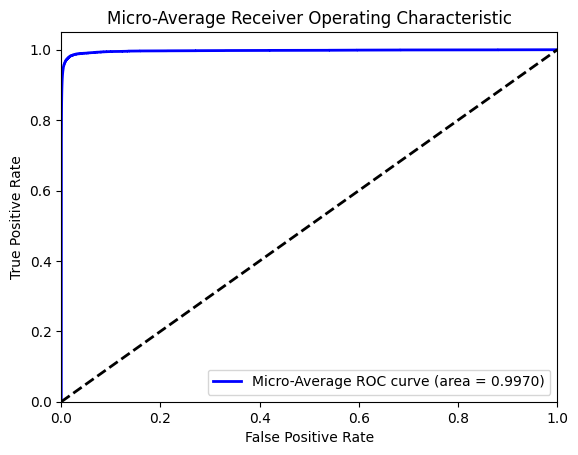

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/gaussian_noise/1_ConvNext/ConvNext_1_metrics.txt


100%|██████████| 10000/10000 [00:59<00:00, 168.35it/s]


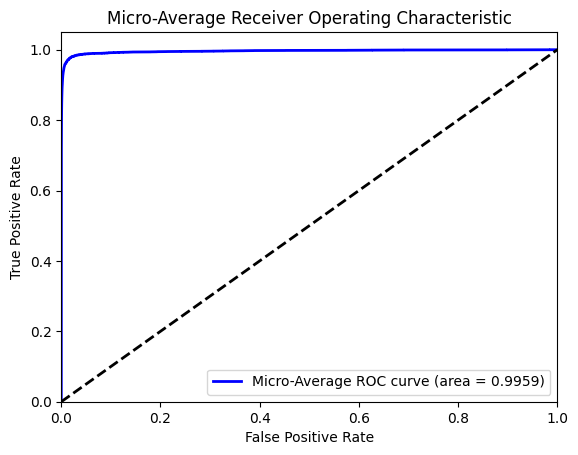

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/gaussian_noise/2_ConvNext/ConvNext_2_metrics.txt


100%|██████████| 10000/10000 [01:00<00:00, 164.08it/s]


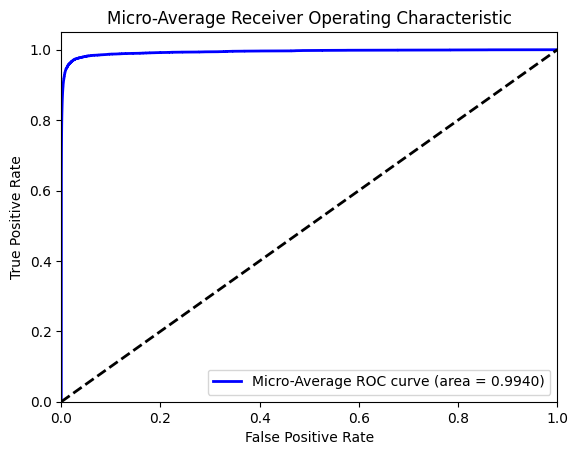

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/gaussian_noise/3_ConvNext/ConvNext_3_metrics.txt


100%|██████████| 10000/10000 [00:55<00:00, 179.94it/s]


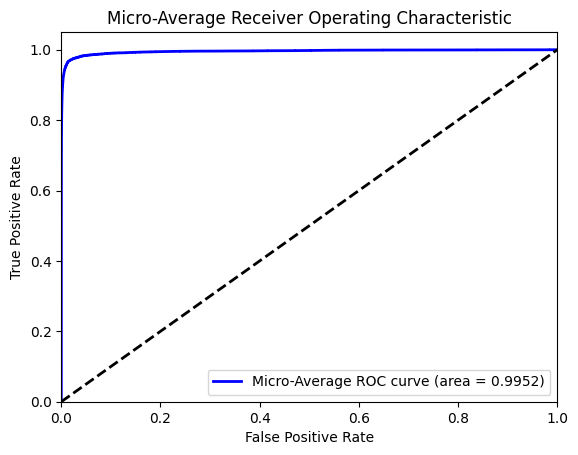

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/defocus_blur/1_ConvNext/ConvNext_1_metrics.txt


100%|██████████| 10000/10000 [00:55<00:00, 180.79it/s]


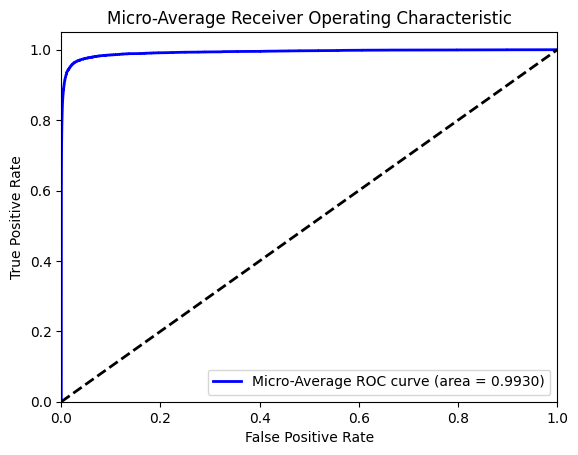

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/defocus_blur/2_ConvNext/ConvNext_2_metrics.txt


100%|██████████| 10000/10000 [00:55<00:00, 181.58it/s]


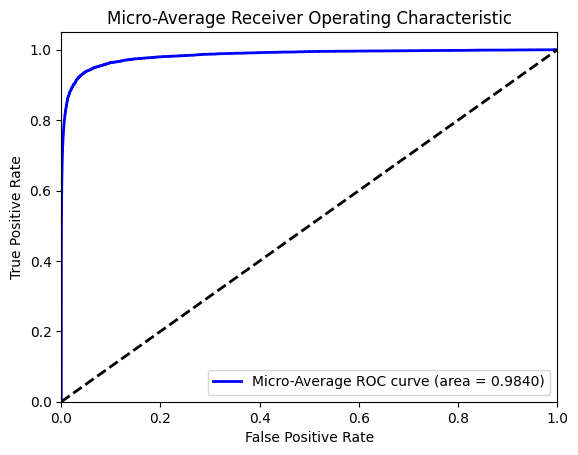

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/defocus_blur/3_ConvNext/ConvNext_3_metrics.txt


100%|██████████| 10000/10000 [00:58<00:00, 170.91it/s]


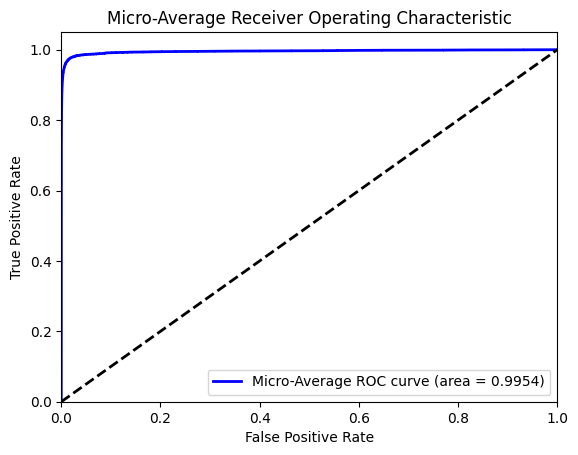

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/pixelate/1_ConvNext/ConvNext_1_metrics.txt


100%|██████████| 10000/10000 [00:56<00:00, 177.95it/s]


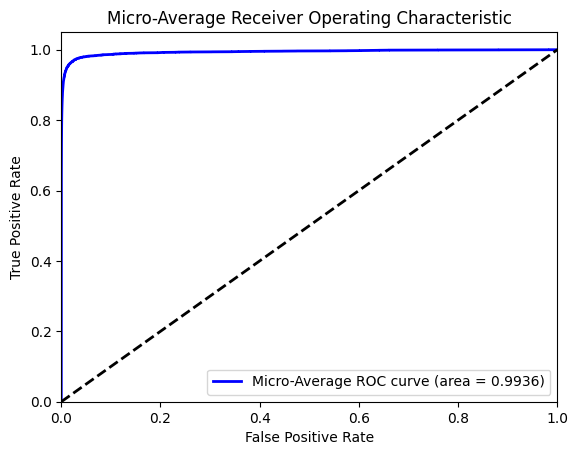

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/pixelate/2_ConvNext/ConvNext_2_metrics.txt


100%|██████████| 10000/10000 [00:55<00:00, 179.41it/s]


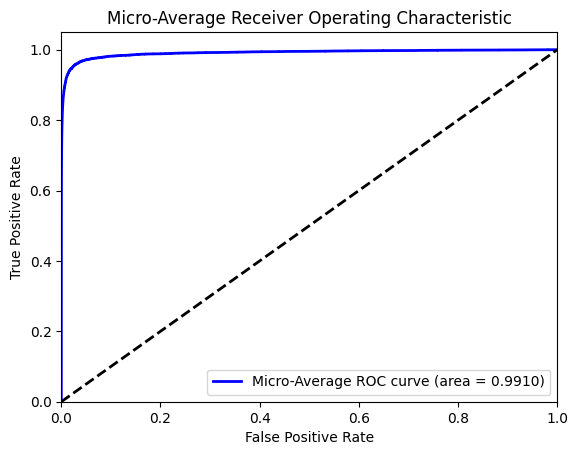

Metrics saved to /home/z/Music/code/CAIN/imagenet/val_images10k_attack/pixelate/3_ConvNext/ConvNext_3_metrics.txt


In [5]:
# import os
# import numpy as np
# from PIL import Image
# from tqdm import tqdm
# from torchvision import transforms
# from transformers import ConvNextForImageClassification
# from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, confusion_matrix
# from sklearn.preprocessing import label_binarize
# import matplotlib.pyplot as plt
# import json
# import torch
# from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# # Function to load images
# def load_images_from_directory(root_path: str):
#     dataset = []
#     for label in os.listdir(root_path):
#         label_path = os.path.join(root_path, label)
#         if os.path.isdir(label_path):
#             for image_file in os.listdir(label_path):
#                 image_path = os.path.join(label_path, image_file)
#                 if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
#                     img = Image.open(image_path)
#                     dataset.append((img, label, image_file))
#     return dataset

# def ensure_rgb(img):
#     if img.mode != 'RGB':
#         return img.convert('RGB')
#     return img

# current_dir = "/home/z/Music/code/CAIN"
# dataset_paths = [
#     f"{current_dir}/imagenet/val_images10k",
#     f"{current_dir}/imagenet/val_images10k_attack/gaussian_noise/1",
#     f"{current_dir}/imagenet/val_images10k_attack/gaussian_noise/2",
#     f"{current_dir}/imagenet/val_images10k_attack/gaussian_noise/3",
#     f"{current_dir}/imagenet/val_images10k_attack/defocus_blur/1",
#     f"{current_dir}/imagenet/val_images10k_attack/defocus_blur/2",
#     f"{current_dir}/imagenet/val_images10k_attack/defocus_blur/3", 
#     f"{current_dir}/imagenet/val_images10k_attack/pixelate/1",
#     f"{current_dir}/imagenet/val_images10k_attack/pixelate/2",
#     f"{current_dir}/imagenet/val_images10k_attack/pixelate/3",
# ]

# for dataset_path in dataset_paths:
#     dataset = load_images_from_directory(dataset_path)
#     with open(f"{current_dir}/imagenet/imagenet_class_index.json", "r") as f:
#         imagenet_class_index = json.load(f)

#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     label_to_index_description = {v[0]: (k, v[1]) for k, v in imagenet_class_index.items()}
#     model = ConvNextForImageClassification.from_pretrained("facebook/convnext-tiny-224").to(device)
#     model.eval()

#     normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#     transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), normalize])

#     predicted_probs = []
#     true_labels = []
#     predicted_labels = []

#     target_dir = dataset_path + "_ConvNext"
#     os.makedirs(target_dir, exist_ok=True)
#     num_classes = 1000

#     for img, label, filename in tqdm(dataset):
#         img = ensure_rgb(img)  
#         img_tensor = transform(img).to(device)
#         with torch.no_grad():
#             logits = model(img_tensor.unsqueeze(0)).logits
#             probabilities = torch.softmax(logits, dim=1).cpu().numpy()[0]

#         index_str, _ = label_to_index_description.get(label, (None, None))
#         if index_str is None:
#             continue
#         true_label = int(index_str)
#         true_labels.append(true_label)
#         predicted_probs.append(probabilities)
#         predicted_label = np.argmax(probabilities)
#         predicted_labels.append(predicted_label)

#     true_labels_binary = label_binarize(true_labels, classes=range(num_classes))
#     predicted_probs = np.array(predicted_probs)

#     fpr, tpr, _ = roc_curve(true_labels_binary.ravel(), predicted_probs.ravel())
#     roc_auc = auc(fpr, tpr)

#     plt.figure()
#     plt.plot(fpr, tpr, color='blue', lw=2, label='Micro-Average ROC curve (area = {0:0.4f})'.format(roc_auc))
#     plt.plot([0, 1], [0, 1], 'k--', lw=2)
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Micro-Average Receiver Operating Characteristic')
#     plt.legend(loc="lower right")
#     roc_curve_path = os.path.join(target_dir, f"{os.path.basename(dataset_path)}_roc_curve.png")
#     plt.savefig(roc_curve_path)
#     plt.show()

#     precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='micro')
#     cm = confusion_matrix(true_labels, predicted_labels)
#     tp = np.diag(cm)
#     fp = cm.sum(axis=0) - tp
#     fn = cm.sum(axis=1) - tp
#     tn = cm.sum() - (fp + fn + tp)

#     dataset_name = os.path.basename(dataset_path)
#     model_name = "ConvNext"
#     metrics_filename = f"{model_name}_{dataset_name}_metrics.txt"
#     metrics_path = os.path.join(target_dir, metrics_filename)

#     with open(metrics_path, "w") as f:
#         f.write(f"Micro-Average AUC: {roc_auc:.5f}\n")
#         f.write(f"Precision (micro-average): {precision:.5f}\n")
#         f.write(f"Recall (micro-average): {recall:.5f}\n")
#         f.write(f"F1 Score (micro-average): {f1_score:.5f}\n")
#         f.write(f"True Positives (per class): {tp.tolist()}\n")
#         f.write(f"False Positives (per class): {fp.tolist()}\n")
#         f.write(f"False Negatives (per class): {fn.tolist()}\n")
#         f.write(f"True Negatives (per class): {tn.tolist()}\n")

#     print(f"Metrics saved to {metrics_path}")
       


[codecarbon INFO @ 12:22:52] [setup] RAM Tracking...
[codecarbon INFO @ 12:22:52] [setup] GPU Tracking...
[codecarbon INFO @ 12:22:52] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 12:22:52] [setup] CPU Tracking...
[codecarbon WARNING @ 12:22:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 12:22:54] CPU Model on constant consumption mode: Intel(R) Core(TM) i9-9900K CPU @ 3.60GHz
[codecarbon INFO @ 12:22:54] >>> Tracker's metadata:
[codecarbon INFO @ 12:22:54]   Platform system: Linux-6.2.0-36-generic-x86_64-with-glibc2.17
[codecarbon INFO @ 12:22:54]   Python version: 3.8.18
[codecarbon INFO @ 12:22:54]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 12:22:54]   Available RAM : 31.242 GB
[codecarbon INFO @ 12:22:54]   CPU count: 16
[codecarbon INFO @ 12:22:54]   CPU model: Intel(R) Core(TM) i9-9900K CPU @ 3.60GHz
[codecarbon INFO @ 12:22:54]   GPU count: 1
[codecarbon INFO @ 12:22:54]   GPU model: 1 x NVIDIA GeForce RTX 4090
 13%|█▎        | 125

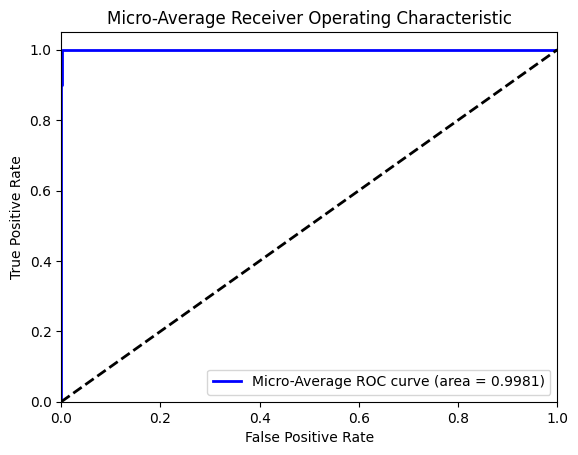

NameError: name 'roc_auc_one_vs_all' is not defined

<Figure size 640x480 with 0 Axes>

[codecarbon INFO @ 12:24:42] Energy consumed for RAM : 0.000342 kWh. RAM Power : 11.715703010559082 W
[codecarbon INFO @ 12:24:42] Energy consumed for all GPUs : 0.002672 kWh. Total GPU Power : 80.60076141622346 W
[codecarbon INFO @ 12:24:42] Energy consumed for all CPUs : 0.001385 kWh. Total CPU Power : 47.5 W
[codecarbon INFO @ 12:24:42] 0.004399 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:24:57] Energy consumed for RAM : 0.000390 kWh. RAM Power : 11.715703010559082 W
[codecarbon INFO @ 12:24:57] Energy consumed for all GPUs : 0.002908 kWh. Total GPU Power : 56.632147997212755 W
[codecarbon INFO @ 12:24:57] Energy consumed for all CPUs : 0.001583 kWh. Total CPU Power : 47.5 W
[codecarbon INFO @ 12:24:57] 0.004881 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:25:12] Energy consumed for RAM : 0.000439 kWh. RAM Power : 11.715703010559082 W
[codecarbon INFO @ 12:25:12] Energy consumed for all GPUs : 0.003059 kWh. Total GPU Power : 36.3840482845

In [ ]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
from torchvision import transforms
from transformers import ConvNextForImageClassification
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import json
import torch
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from codecarbon import EmissionsTracker

tracker = EmissionsTracker()
tracker.start()


# Function to load images
def load_images_from_directory(root_path: str):
    dataset = []
    for label in os.listdir(root_path):
        label_path = os.path.join(root_path, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img = Image.open(image_path)
                    dataset.append((img, label, image_file))
    return dataset

def ensure_rgb(img):
    if img.mode != 'RGB':
        return img.convert('RGB')
    return img

current_dir = "/home/z/Music/code/CAIN"
dataset_paths = [
    f"{current_dir}/imagenet/val_images10k",
    f"{current_dir}/imagenet/val_images10k_attack/gaussian_noise/1",
    f"{current_dir}/imagenet/val_images10k_attack/gaussian_noise/2",
    f"{current_dir}/imagenet/val_images10k_attack/gaussian_noise/3",
    f"{current_dir}/imagenet/val_images10k_attack/defocus_blur/1",
    f"{current_dir}/imagenet/val_images10k_attack/defocus_blur/2",
    f"{current_dir}/imagenet/val_images10k_attack/defocus_blur/3", 
    f"{current_dir}/imagenet/val_images10k_attack/pixelate/1",
    f"{current_dir}/imagenet/val_images10k_attack/pixelate/2",
    f"{current_dir}/imagenet/val_images10k_attack/pixelate/3",
]


for dataset_path in dataset_paths:
    dataset = load_images_from_directory(dataset_path)
    with open(f"{current_dir}/imagenet/imagenet_class_index.json", "r") as f:
        imagenet_class_index = json.load(f)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    label_to_index_description = {v[0]: (k, v[1]) for k, v in imagenet_class_index.items()}
    model = ConvNextForImageClassification.from_pretrained("facebook/convnext-tiny-224").to(device)
    model.eval()

    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), normalize])

    predicted_probs = []
    true_labels = []
    predicted_labels = []

    target_dir = dataset_path + "_ConvNext"
    os.makedirs(target_dir, exist_ok=True)
    num_classes = 1000

    for img, label, filename in tqdm(dataset):
        img = ensure_rgb(img)  
        img_tensor = transform(img).to(device)
        with torch.no_grad():
            logits = model(img_tensor.unsqueeze(0)).logits
            probabilities = torch.softmax(logits, dim=1).cpu().numpy()[0]

        index_str, _ = label_to_index_description.get(label, (None, None))
        if index_str is None:
            continue
        true_label = int(index_str)
        true_labels.append(true_label)
        predicted_probs.append(probabilities)
        predicted_label = np.argmax(probabilities)
        predicted_labels.append(predicted_label)

    true_labels_binary = label_binarize(true_labels, classes=range(num_classes))
    predicted_probs = np.array(predicted_probs)

    fpr, tpr, _ = roc_curve(true_labels_binary.ravel(), predicted_probs.ravel())
    roc_auc = auc(fpr, tpr)

    class_auc_scores = []
    for i in range(num_classes):
        true_binary = (np.array(true_labels) == i).astype(int)
        pred_probs = predicted_probs[:, i]
        fpr, tpr, _ = roc_curve(true_binary, pred_probs)
        auc_score = auc(fpr, tpr)
        class_auc_scores.append(auc_score)
    roc_auc_one_vs_rest = np.mean(class_auc_scores)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='Micro-Average ROC curve (area = {0:0.4f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Micro-Average Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    roc_curve_path = os.path.join(target_dir, f"{os.path.basename(dataset_path)}_roc_curve.png")
    plt.savefig(roc_curve_path)
    plt.show()
    plt.figure()
    plt.plot(range(num_classes), class_auc_scores, color='blue', lw=2, label='One-vs-All ROC curve (area = {0:0.4f})'.format(roc_auc_one_vs_all))
    plt.plot([0, num_classes], [0.5, 0.5], 'k--', lw=2)
    plt.xlim([0, num_classes])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Class')
    plt.ylabel('AUC Score')
    plt.title('One-vs-All Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    roc_curve_path = os.path.join(target_dir, f"{os.path.basename(dataset_path)}_roc_curve.png")
    plt.savefig(roc_curve_path)
    plt.show()

    precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='micro')
    cm = confusion_matrix(true_labels, predicted_labels)
    tp = np.diag(cm)
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = cm.sum() - (fp + fn + tp)

    dataset_name = os.path.basename(dataset_path)
    model_name = "ConvNext"
    metrics_filename = f"{model_name}_{dataset_name}_metrics.txt"
    metrics_path = os.path.join(target_dir, metrics_filename)

    with open(metrics_path, "w") as f:
        f.write(f"Micro-Average AUC: {roc_auc:.5f}\n")
        f.write(f"One-vs-All Average AUC: {roc_auc_one_vs_rest:.5f}\n")
        f.write(f"Precision (micro-average): {precision:.5f}\n")
        f.write(f"Recall (micro-average): {recall:.5f}\n")
        f.write(f"F1 Score (micro-average): {f1_score:.5f}\n")
        f.write(f"True Positives (per class): {tp.tolist()}\n")
        f.write(f"False Positives (per class): {fp.tolist()}\n")
        f.write(f"False Negatives (per class): {fn.tolist()}\n")
        f.write(f"True Negatives (per class): {tn.tolist()}\n")

    print(f"Metrics saved to {metrics_path}")
tracker.stop()

/home/z/miniconda3/envs/xai/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 10000/10000 [01:28<00:00, 113.17it/s]


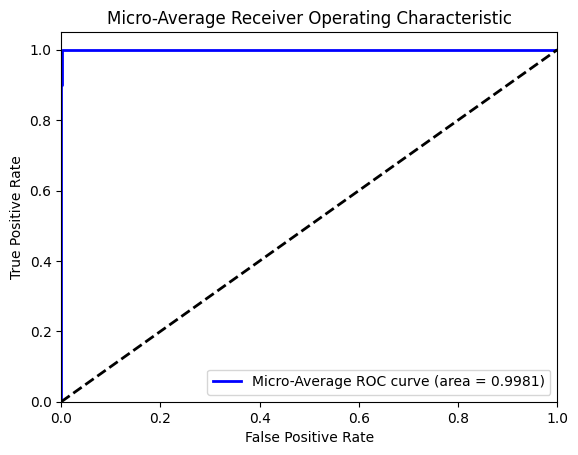

NameError: name 'roc_auc_one_vs_all' is not defined

<Figure size 640x480 with 0 Axes>

In [2]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
from torchvision import transforms
from transformers import ConvNextForImageClassification
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import json
import torch
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from scipy.stats import ks_2samp 


# Function to load images
def load_images_from_directory(root_path: str):
    dataset = []
    for label in os.listdir(root_path):
        label_path = os.path.join(root_path, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img = Image.open(image_path)
                    dataset.append((img, label, image_file))
    return dataset

def ensure_rgb(img):
    if img.mode != 'RGB':
        return img.convert('RGB')
    return img
def calculate_ks_statistic(distribution1, distribution2):
    ks_statistic, p_value = ks_2samp(distribution1, distribution2)
    return ks_statistic


current_dir = "/home/z/Music/code/CAIN"
dataset_paths = [
    f"{current_dir}/imagenet/val_images10k",
    f"{current_dir}/imagenet/val_images10k_attack/gaussian_noise/1",
    f"{current_dir}/imagenet/val_images10k_attack/gaussian_noise/2",
    f"{current_dir}/imagenet/val_images10k_attack/gaussian_noise/3",
    f"{current_dir}/imagenet/val_images10k_attack/defocus_blur/1",
    f"{current_dir}/imagenet/val_images10k_attack/defocus_blur/2",
    f"{current_dir}/imagenet/val_images10k_attack/defocus_blur/3", 
    f"{current_dir}/imagenet/val_images10k_attack/pixelate/1",
    f"{current_dir}/imagenet/val_images10k_attack/pixelate/2",
    f"{current_dir}/imagenet/val_images10k_attack/pixelate/3",
]
original_dataset_probs = None
for dataset_path in dataset_paths:
    dataset = load_images_from_directory(dataset_path)
    with open(f"{current_dir}/imagenet/imagenet_class_index.json", "r") as f:
        imagenet_class_index = json.load(f)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    label_to_index_description = {v[0]: (k, v[1]) for k, v in imagenet_class_index.items()}
    model = ConvNextForImageClassification.from_pretrained("facebook/convnext-tiny-224").to(device)
    model.eval()

    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), normalize])

    predicted_probs = []
    true_labels = []
    predicted_labels = []

    target_dir = dataset_path + "_ConvNext"
    os.makedirs(target_dir, exist_ok=True)
    num_classes = 1000

    for img, label, filename in tqdm(dataset):
        img = ensure_rgb(img)  
        img_tensor = transform(img).to(device)
        with torch.no_grad():
            logits = model(img_tensor.unsqueeze(0)).logits
            probabilities = torch.softmax(logits, dim=1).cpu().numpy()[0]

        index_str, _ = label_to_index_description.get(label, (None, None))
        if index_str is None:
            continue
        true_label = int(index_str)
        true_labels.append(true_label)
        predicted_probs.append(probabilities)
        predicted_label = np.argmax(probabilities)
        predicted_labels.append(predicted_label)

    true_labels_binary = label_binarize(true_labels, classes=range(num_classes))
    predicted_probs = np.array(predicted_probs)

    fpr, tpr, _ = roc_curve(true_labels_binary.ravel(), predicted_probs.ravel())
    roc_auc = auc(fpr, tpr)

    class_auc_scores = []
    for i in range(num_classes):
        true_binary = (np.array(true_labels) == i).astype(int)
        pred_probs = predicted_probs[:, i]
        fpr, tpr, _ = roc_curve(true_binary, pred_probs)
        auc_score = auc(fpr, tpr)
        class_auc_scores.append(auc_score)
    roc_auc_one_vs_rest = np.mean(class_auc_scores)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='Micro-Average ROC curve (area = {0:0.4f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Micro-Average Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    roc_curve_path = os.path.join(target_dir, f"{os.path.basename(dataset_path)}_roc_curve.png")
    plt.savefig(roc_curve_path)
    plt.show()
    plt.figure()
    plt.plot(range(num_classes), class_auc_scores, color='blue', lw=2, label='One-vs-All ROC curve (area = {0:0.4f})'.format(roc_auc_one_vs_all))
    plt.plot([0, num_classes], [0.5, 0.5], 'k--', lw=2)
    plt.xlim([0, num_classes])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Class')
    plt.ylabel('AUC Score')
    plt.title('One-vs-All Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    roc_curve_path = os.path.join(target_dir, f"{os.path.basename(dataset_path)}_roc_curve.png")
    plt.savefig(roc_curve_path)
    plt.show()

    precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='micro')
    cm = confusion_matrix(true_labels, predicted_labels)
    tp = np.diag(cm)
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = cm.sum() - (fp + fn + tp)

    if dataset_path == dataset_paths[0]:
        original_dataset_probs = [max(probs) for probs in predicted_probs]  # 选择最高的概率值
    else:
        # 对于攻击数据集
        attacked_dataset_probs = [max(probs) for probs in predicted_probs]
        ks_statistic = calculate_ks_statistic(original_dataset_probs, attacked_dataset_probs)
        print(f"K-S statistic for {os.path.basename(dataset_path)}: {ks_statistic:.5f}")

        # 将K-S值写入度量文件
        with open(metrics_path, "a") as f:
            f.write(f"K-S Statistic (vs original): {ks_statistic:.5f}\n")


    dataset_name = os.path.basename(dataset_path)
    model_name = "ConvNext"
    metrics_filename = f"{model_name}_{dataset_name}_metrics.txt"
    metrics_path = os.path.join(target_dir, metrics_filename)



    with open(metrics_path, "w") as f:
        f.write(f"Micro-Average AUC: {roc_auc:.5f}\n")
        f.write(f"One-vs-All Average AUC: {roc_auc_one_vs_rest:.5f}\n")
        f.write(f"Precision (micro-average): {precision:.5f}\n")
        f.write(f"Recall (micro-average): {recall:.5f}\n")
        f.write(f"F1 Score (micro-average): {f1_score:.5f}\n")
        f.write(f"True Positives (per class): {tp.tolist()}\n")
        f.write(f"False Positives (per class): {fp.tolist()}\n")
        f.write(f"False Negatives (per class): {fn.tolist()}\n")
        f.write(f"True Negatives (per class): {tn.tolist()}\n")

    print(f"Metrics saved to {metrics_path}")
